In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

repository_info = pd.read_csv("final_repo_english_whatwhy.csv")

# Evaluation of repo pair ranking based on observed stargazing connections

## Star-based ground truth

In the following it is tested how much the average ranking of the 37 repositories who are connected through
stargazing of their members differ from a randomly created ranking.

### Load rankings

In [2]:
import pickle
with open("../rankings/ranking_nmf_45_mult.pickle/", "rb") as f:
    ranking_nmf_multiplicative = pickle.load(f)    
with open("../rankings/ranking_lda_45_mult.pickle", "rb") as f:
    ranking_lda_multiplicative = pickle.load(f)
    
with open("../rankings/ranking_nmf_45_rwr00.pickle", "rb") as f:
    ranking_nmf_rwr_d00 = pickle.load(f)
with open("../rankings/ranking_nmf_45_rwr01.pickle", "rb") as f:
    ranking_nmf_rwr_d01 = pickle.load(f)
with open("../rankings/ranking_nmf_45_rwr02.pickle", "rb") as f:
    ranking_nmf_rwr_d02 = pickle.load(f)
with open("../rankings/ranking_nmf_45_rwr03.pickle", "rb") as f:
    ranking_nmf_rwr_d03 = pickle.load(f)
with open("../rankings/ranking_nmf_45_rwr05.pickle", "rb") as f:
    ranking_nmf_rwr_d05 = pickle.load(f)
with open("../rankings/ranking_nmf_45_rwr08.pickle", "rb") as f:
    ranking_nmf_rwr_d08 = pickle.load(f)

with open("../rankings/ranking_lda_45_rwr00.pickle", "rb") as f:
    ranking_lda_rwr_d00 = pickle.load(f)
with open("../rankings/ranking_lda_45_rwr02.pickle", "rb") as f:
    ranking_lda_rwr_d01 = pickle.load(f)
with open("../rankings/ranking_lda_45_rwr02.pickle", "rb") as f:
    ranking_lda_rwr_d02 = pickle.load(f)
with open("../rankings/ranking_lda_45_rwr02.pickle", "rb") as f:
    ranking_lda_rwr_d03 = pickle.load(f)
with open("../rankings/ranking_lda_45_rwr05.pickle", "rb") as f:
    ranking_lda_rwr_d05 = pickle.load(f)
with open("../rankings/ranking_lda_45_rwr08.pickle", "rb") as f:
    ranking_lda_rwr_d08 = pickle.load(f)

### Identify ranks for stargazes repositories
For each repostory $r_i$ who has a member who bookmarked another repository $r_j$ it is computed how high $r_2$ is ranked given $r_i$ relative to other repositories.

In [ ]:
star_connections = pd.read_csv("../data/evaluation/repo_connections_sg_based.csv")

# Get index tuples from repository info
star_gt = [(repository_info.url[repository_info.url == star_connections.source_url[row]].index[0], 
                      repository_info.url[repository_info.url == star_connections.target_url[row]].index[0]) 
                                         for row in range(0, star_connections.shape[0]) 
                                         if any(repository_info.url == star_connections.target_url[row])]

print("This will take a while ...")
nmf_multiplicative_records = list(zip(ranking_nmf_multiplicative[0], ranking_nmf_multiplicative[1]))
nmf_multiplicative = [nmf_multiplicative_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del lda_multiplicative_records # Necessary to avoid out of memory issues when computed on a local machine
lda_multiplicative_records = list(zip(ranking_lda_multiplicative[0], ranking_lda_multiplicative[1]))
lda_multiplicative = [lda_multiplicative_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del lda_multiplicative_records 

nmf_rwr_d00_records = list(zip(ranking_nmf_rwr_d00[0], ranking_nmf_rwr_d00[1]))
nmf_rwr_d00 = [nmf_rwr_d00_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del nmf_rwr_d00_records
nmf_rwr_d01_records = list(zip(ranking_nmf_rwr_d01[0], ranking_nmf_rwr_d01[1]))
nmf_rwr_d01 = [nmf_rwr_d01_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del nmf_rwr_d01_records
nmf_rwr_d02_records = list(zip(ranking_nmf_rwr_d02[0], ranking_nmf_rwr_d02[1]))
nmf_rwr_d02 = [nmf_rwr_d02_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del nmf_rwr_d02_records
nmf_rwr_d03_records = list(zip(ranking_nmf_rwr_d03[0], ranking_nmf_rwr_d03[1]))
nmf_rwr_d03 = [nmf_rwr_d02_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del nmf_rwr_d03_records
nmf_rwr_d05_records = list(zip(ranking_nmf_rwr_d05[0], ranking_nmf_rwr_d05[1]))
nmf_rwr_d05 = [nmf_rwr_d05_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del nmf_rwr_d05_records
nmf_rwr_d08_records = list(zip(ranking_nmf_rwr_d08[0], ranking_nmf_rwr_d08[1]))
nmf_rwr_d08 = [nmf_rwr_d08_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del nmf_rwr_d08_records

lda_rwr_d00_records = list(zip(ranking_lda_rwr_d00[0], ranking_lda_rwr_d00[1]))
lda_rwr_d00 = [lda_rwr_d02_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del lda_rwr_d00_records
lda_rwr_d01_records = list(zip(ranking_lda_rwr_d01[0], ranking_lda_rwr_d01[1]))
lda_rwr_d01 = [lda_rwr_d01_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del lda_rwr_d01_records
lda_rwr_d02_records = list(zip(ranking_lda_rwr_d02[0], ranking_lda_rwr_d02[1]))
lda_rwr_d02 = [lda_rwr_d02_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del lda_rwr_d02_records
lda_rwr_d03_records = list(zip(ranking_lda_rwr_d03[0], ranking_lda_rwr_d03[1]))
lda_rwr_d03 = [lda_rwr_d02_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del lda_rwr_d03_records
lda_rwr_d05_records = list(zip(ranking_lda_rwr_d05[0], ranking_lda_rwr_d05[1]))
lda_rwr_d05 = [lda_rwr_d05_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del lda_rwr_d05_records
lda_rwr_d08_records = list(zip(ranking_lda_rwr_d08[0], ranking_lda_rwr_d08[1]))
lda_rwr_d08 = [lda_rwr_d08_records.index(pair) for pair in star_gt if pair[0] != pair[1]]
del lda_rwr_d08_records

print("Done")

result_df = pd.DataFrame({
    "nmf_multiplicative" : nmf_multiplicative,
    "lda_multiplicative" : lda_multiplicative,
    "nmf_rwr_d00" : nmf_rwr_d00,
    "nmf_rwr_d01" : nmf_rwr_d01,
    "nmf_rwr_d02" : nmf_rwr_d02,
    "nmf_rwr_d03" : nmf_rwr_d03,
    "nmf_rwr_d05" : nmf_rwr_d05,
    "nmf_rwr_d08" : nmf_rwr_d08,
    "lda_rwr_d00" : lda_rwr_d00,
    "lda_rwr_d01" : lda_rwr_d01,
    "lda_rwr_d02" : lda_rwr_d02,
    "lda_rwr_d03" : lda_rwr_d03,
    "lda_rwr_d05" : lda_rwr_d05,
    "lda_rwr_d08" : lda_rwr_d08
})

result_df.to_csv("../data/evaluation/evaluation_results_sg_45_features.csv")

**Compute relative ranks for $r_2$ given $r_1$** 

In [151]:
def check_ranking(group):

    return pd.DataFrame(
        [
            (group.source.iloc[0], group.target.iloc[i], (i + 1) / group.count()[0]) 
            for i in range(0, group.count()[0])
                           if (group.source.iloc[0], group.target.iloc[i]) in star_gt
        ],
        columns=["source", "target","rank"]
    )

# NMF multiplicative
gt_indexes_nmf_mult = np.isin(ranking_nmf_multiplicative[0], [x for x, y in star_gt])
ground_truth_nmf_mult = pd.DataFrame(
    zip(ranking_nmf_multiplicative[0][gt_indexes_nmf_mult], ranking_nmf_multiplicative[1][gt_indexes_nmf_mult]),
    columns=["source", "target"]
)
res_nmf_mult = ground_truth_nmf_mult.groupby("source").apply(check_ranking)

# LDA multiplicative
gt_indexes_lda_mult = np.isin(ranking_lda_multiplicative[0], [x for x, y in star_gt])
ground_truth_lda_mult = pd.DataFrame(
    zip(ranking_lda_multiplicative[0][gt_indexes_lda_mult], ranking_lda_multiplicative[1][gt_indexes_lda_mult]),
    columns=["source", "target"]
)
res_lda_mult = ground_truth_lda_mult.groupby("source").apply(check_ranking)

# NMF rwr d=0.0
gt_indexes_nmf_rwr00 = np.isin(ranking_nmf_rwr_d00[0], [x for x, y in star_gt])
ground_truth_rwr00 = pd.DataFrame(
    zip(ranking_nmf_rwr_d00[0][gt_indexes_nmf_rwr00], ranking_nmf_rwr_d00[1][gt_indexes_nmf_rwr00]),
    columns=["source", "target"]
)
res_nmf_rwr00 = ground_truth_rwr00.groupby("source").apply(check_ranking)

# NMF rwr d=0.1
gt_indexes_nmf_rwr01 = np.isin(ranking_nmf_rwr_d01[0], [x for x, y in star_gt])
ground_truth_rwr01 = pd.DataFrame(
    zip(ranking_nmf_rwr_d01[0][gt_indexes_nmf_rwr01], ranking_nmf_rwr_d01[1][gt_indexes_nmf_rwr01]),
    columns=["source", "target"]
)
res_nmf_rwr01 = ground_truth_rwr01.groupby("source").apply(check_ranking)

# NMF rwr d=0.2
gt_indexes_nmf_rwr02 = np.isin(ranking_nmf_rwr_d02[0], [x for x, y in star_gt])
ground_truth_rwr02 = pd.DataFrame(
    zip(ranking_nmf_rwr_d02[0][gt_indexes_nmf_rwr02], ranking_nmf_rwr_d02[1][gt_indexes_nmf_rwr02]),
    columns=["source", "target"]
)
res_nmf_rwr02 = ground_truth_rwr02.groupby("source").apply(check_ranking)

# NMF rwr d=0.3
gt_indexes_nmf_rwr03 = np.isin(ranking_nmf_rwr_d03[0], [x for x, y in star_gt])
ground_truth_rwr03 = pd.DataFrame(
    zip(ranking_nmf_rwr_d03[0][gt_indexes_nmf_rwr03], ranking_nmf_rwr_d03[1][gt_indexes_nmf_rwr03]),
    columns=["source", "target"]
)
res_nmf_rwr03 = ground_truth_rwr03.groupby("source").apply(check_ranking)

# NMF rwr d=0.5
gt_indexes_nmf_rwr05 = np.isin(ranking_nmf_rwr_d05[0], [x for x, y in star_gt])
ground_truth_rwr05 = pd.DataFrame(
    zip(ranking_nmf_rwr_d05[0][gt_indexes_nmf_rwr05], ranking_nmf_rwr_d05[1][gt_indexes_nmf_rwr05]),
    columns=["source", "target"]
)
res_nmf_rwr05 = ground_truth_rwr05.groupby("source").apply(check_ranking)

# NMF rwr d=0.8
gt_indexes_nmf_rwr08 = np.isin(ranking_nmf_rwr_d08[0], [x for x, y in star_gt])
ground_truth_rwr08 = pd.DataFrame(
    zip(ranking_nmf_rwr_d08[0][gt_indexes_nmf_rwr08], ranking_nmf_rwr_d08[1][gt_indexes_nmf_rwr08]),
    columns=["source", "target"]
)
res_nmf_rwr08 = ground_truth_rwr08.groupby("source").apply(check_ranking)

# LDA rwr d=0.0
gt_indexes_lda_rwr00 = np.isin(ranking_lda_rwr_d00[0], [x for x, y in star_gt])
ground_truth_rwr00 = pd.DataFrame(
    zip(ranking_lda_rwr_d00[0][gt_indexes_lda_rwr00], ranking_lda_rwr_d00[1][gt_indexes_lda_rwr00]),
    columns=["source", "target"]
)
res_lda_rwr00 = ground_truth_rwr00.groupby("source").apply(check_ranking)

# LDA rwr d=0.1
gt_indexes_lda_rwr01 = np.isin(ranking_lda_rwr_d01[0], [x for x, y in star_gt])
ground_truth_rwr01 = pd.DataFrame(
    zip(ranking_lda_rwr_d01[0][gt_indexes_lda_rwr01], ranking_lda_rwr_d01[1][gt_indexes_lda_rwr01]),
    columns=["source", "target"]
)
res_lda_rwr01 = ground_truth_rwr01.groupby("source").apply(check_ranking)

# LDA rwr d=0.2
gt_indexes_lda_rwr02 = np.isin(ranking_lda_rwr_d02[0], [x for x, y in star_gt])
ground_truth_rwr02 = pd.DataFrame(
    zip(ranking_lda_rwr_d02[0][gt_indexes_lda_rwr02], ranking_lda_rwr_d02[1][gt_indexes_lda_rwr02]),
    columns=["source", "target"]
)
res_lda_rwr02 = ground_truth_rwr02.groupby("source").apply(check_ranking)

# LDA rwr d=0.3
gt_indexes_lda_rwr03 = np.isin(ranking_lda_rwr_d03[0], [x for x, y in star_gt])
ground_truth_rwr03 = pd.DataFrame(
    zip(ranking_lda_rwr_d03[0][gt_indexes_lda_rwr03], ranking_lda_rwr_d03[1][gt_indexes_lda_rwr03]),
    columns=["source", "target"]
)
res_lda_rwr03 = ground_truth_rwr03.groupby("source").apply(check_ranking)

# LDA rwr d=0.5
gt_indexes_lda_rwr05 = np.isin(ranking_lda_rwr_d05[0], [x for x, y in star_gt])
ground_truth_rwr05 = pd.DataFrame(
    zip(ranking_lda_rwr_d05[0][gt_indexes_lda_rwr05], ranking_lda_rwr_d05[1][gt_indexes_lda_rwr05]),
    columns=["source", "target"]
)
res_lda_rwr05 = ground_truth_rwr05.groupby("source").apply(check_ranking)

# LDA rwr d=0.8
gt_indexes_lda_rwr08 = np.isin(ranking_lda_rwr_d08[0], [x for x, y in star_gt])
ground_truth_rwr08 = pd.DataFrame(
    zip(ranking_lda_rwr_d08[0][gt_indexes_lda_rwr08], ranking_lda_rwr_d08[1][gt_indexes_lda_rwr08]),
    columns=["source", "target"]
)
res_lda_rwr08 = ground_truth_rwr08.groupby("source").apply(check_ranking)


## Results

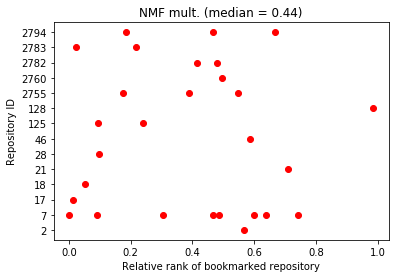

In [10]:
plt.plot(res_nmf_mult["rank"], res_nmf_mult.source.astype("str"), 'ro')
plt.title("NMF mult. (median = " + np.round(np.median(res_nmf_mult["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()

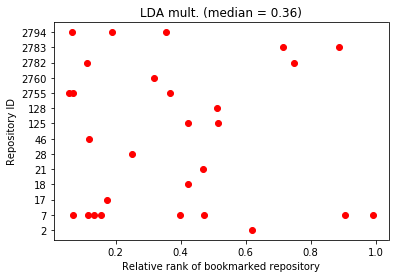

In [152]:
plt.plot(res_lda_mult["rank"], res_lda_mult.source.astype("str"), 'ro')
plt.title("LDA mult. (median = " + np.round(np.median(res_lda_mult["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()

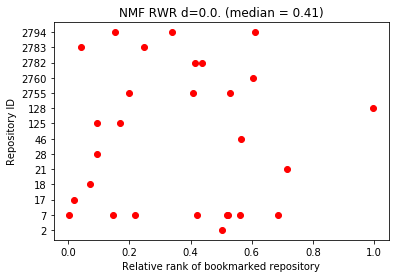

In [8]:
plt.plot(res_nmf_rwr00["rank"], res_nmf_rwr00.source.astype("str"), 'ro')
plt.title("NMF RWR d=0.0. (median = " + np.round(np.median(res_nmf_rwr00["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()

In [ ]:
plt.plot(res_nmf_rwr01["rank"], res_nmf_rwr01.source.astype("str"), 'ro')
plt.title("NMF RWR d=0.1. (median = " + np.round(np.median(res_nmf_rwr00["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()

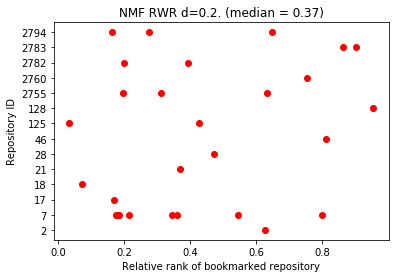

In [153]:
plt.plot(res_nmf_rwr02["rank"], res_nmf_rwr02.source.astype("str"), 'ro')
plt.title("NMF RWR d=0.2. (median = " + np.round(np.median(res_nmf_rwr02["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()

In [ ]:
plt.plot(res_nmf_rwr03["rank"], res_nmf_rwr03.source.astype("str"), 'ro')
plt.title("NMF RWR d=0.3. (median = " + np.round(np.median(res_nmf_rwr03["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()

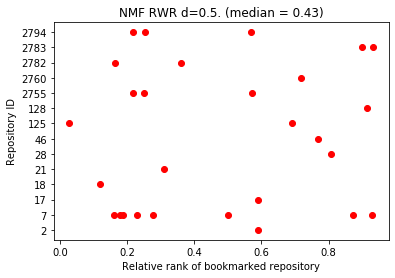

In [11]:
plt.plot(res_nmf_rwr05["rank"], res_nmf_rwr05.source.astype("str"), 'ro')
plt.title("NMF RWR d=0.5. (median = " + np.round(np.median(res_nmf_rwr05["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()

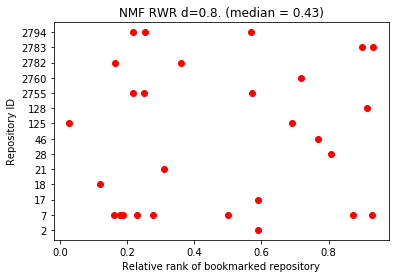

In [155]:
plt.plot(res_nmf_rwr08["rank"], res_nmf_rwr08.source.astype("str"), 'ro')
plt.title("NMF RWR d=0.8. (median = " + np.round(np.median(res_nmf_rwr08["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()

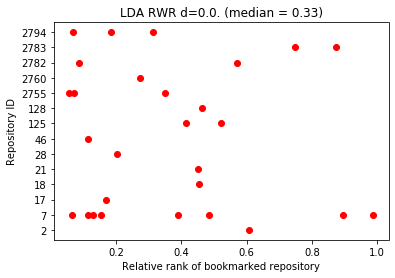

In [9]:
plt.plot(res_lda_rwr00["rank"], res_lda_rwr00.source.astype("str"), 'ro')
plt.title("LDA RWR d=0.0. (median = " + np.round(np.median(res_lda_rwr00["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()

In [ ]:
plt.plot(res_lda_rwr01["rank"], res_lda_rwr01.source.astype("str"), 'ro')
plt.title("LDA RWR d=0.1. (median = " + np.round(np.median(res_lda_rwr00["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()

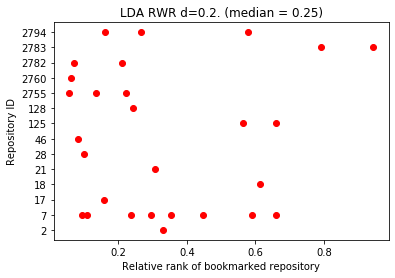

In [156]:
plt.plot(res_lda_rwr02["rank"], res_lda_rwr02.source.astype("str"), 'ro')
plt.title("LDA RWR d=0.2. (median = " + np.round(np.median(res_lda_rwr02["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()

In [ ]:
plt.plot(res_lda_rwr03["rank"], res_lda_rwr03.source.astype("str"), 'ro')
plt.title("LDA RWR d=0.3. (median = " + np.round(np.median(res_lda_rwr00["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()

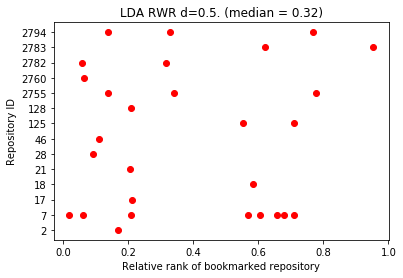

In [12]:
plt.plot(res_lda_rwr05["rank"], res_lda_rwr05.source.astype("str"), 'ro')
plt.title("LDA RWR d=0.5. (median = " + np.round(np.median(res_lda_rwr05["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()

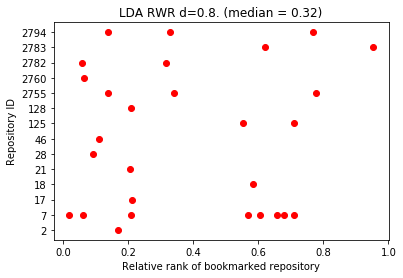

In [158]:
plt.plot(res_lda_rwr08["rank"], res_lda_rwr08.source.astype("str"), 'ro')
plt.title("LDA RWR d=0.8. (median = " + np.round(np.median(res_lda_rwr08["rank"]), 2).astype("str") + ")")
plt.xlabel("Relative rank of bookmarked repository")
plt.ylabel("Repository ID")
plt.show()